C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Index(['neighbourhood', 'neighbourhood_group', 'geometry'], dtype='object')
(44, 3)
44
    neighbourhood  listings
0           78704      1822
1           78702      1263
2           78701       713
3           78741       622
4           78703       530
5           78745       513
6           78705       505
7           78751       478
8           78723       313
9           78758       298
10          78746       256
11          78734       227
12          78757       205
13          78721       204
14          78722       197
15          78744       173
16          78748       148
17          78756       129
18          78729       124
19          78731       121
20          7

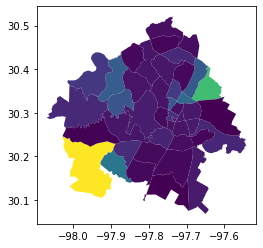

In [1]:
import pandas as pd
import geopandas as gpd

listings = pd.read_csv("../Data/listings.csv")
neighbourhoods = gpd.read_file("../Data/neighbourhoods.geojson")

print(listings.columns)
print(neighbourhoods.columns)
print(neighbourhoods.shape)
print(len(listings.neighbourhood.value_counts()))

list_counts = pd.DataFrame(listings.neighbourhood.value_counts())
list_counts.reset_index(inplace = True)
list_counts = list_counts.rename(columns = {'index':'neighbourhood', 'neighbourhood':'listings'})
print(list_counts)

print(listings.neighbourhood.unique())
print(neighbourhoods.neighbourhood.unique().astype(int))

a = list(listings.neighbourhood.unique())
b = list(neighbourhoods.neighbourhood.unique().astype(int))

a.sort()
b.sort()

so = {}
for i in range(len(a)):
    so[a[i]] = i
print(a == b)

print(listings.neighbourhood.value_counts())
neighbourhoods = neighbourhoods.sort_values(by=['neighbourhood'], key=lambda x: x.map(so)).reset_index()
list_counts = list_counts.sort_values(by=['neighbourhood'], key=lambda x: x.map(so)).reset_index()
neighbourhoods['listings'] = list_counts['listings']
neighbourhoods.plot(column = 'listings')

print(list_counts.neighbourhood.tolist())

#print(neighbourhoods[['listings', 'neighbourhood']])
print(neighbourhoods)
print(listings[['host_id', 'calculated_host_listings_count']])

In [180]:
def thematic(room):
    a = list(neighbourhoods.neighbourhood.unique().astype(int))
    so = {}
    for i in range(len(a)):
        so[a[i]] = i
    
    list_counts = []
    for neigh in a:
        list_counts.append(listings[listings['room_type'] == room].neighbourhood.tolist().count(neigh))

    #print(list_counts)

    neighbourhoods['listings'] = list_counts
    #print(neighbourhoods[['listings', 'neighbourhood']])

    fig, ax = plt.subplots(1, 1, figsize = (15,15))
    ax.title.set_text(room)
    ax.tick_params(
        axis='both', bottom=False, left=False,         
        labelbottom=False, labelleft=False)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad = 0.01)
    lk = {'orientation': "vertical"}
    neighbourhoods.plot(column = 'listings', ax = ax, cax = cax, cmap = 'summer', legend = True, legend_kwds = lk)
    plt.title("No. of listings")
    plt.show()

    

In [52]:
neighbourhoods.dtypes

index                     int64
neighbourhood            object
neighbourhood_group      object
geometry               geometry
listings                  int64
dtype: object

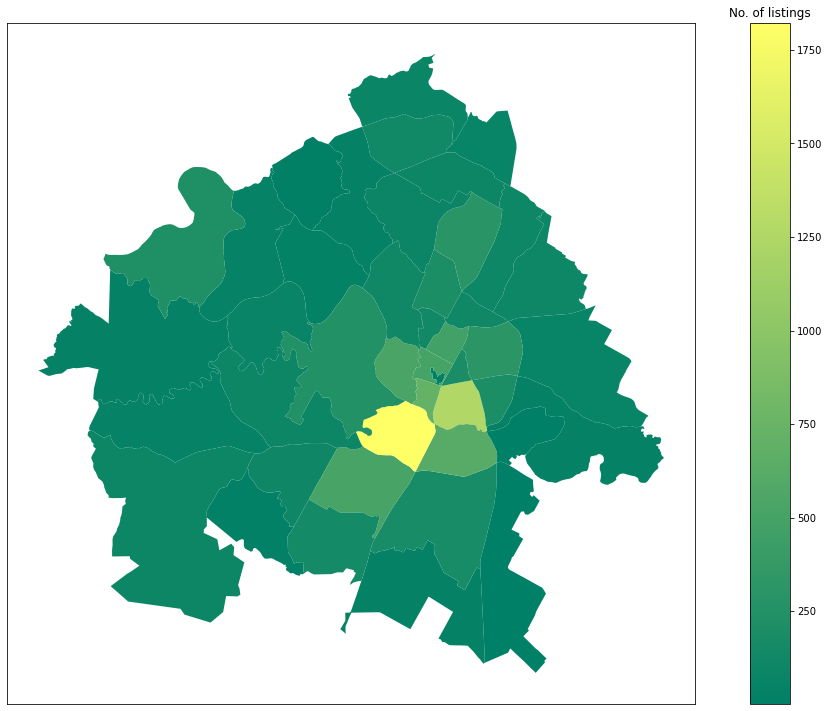

In [118]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

listings = pd.read_csv("listings.csv")
neighbourhoods = gpd.read_file("neighbourhoods.geojson")

list_counts = pd.DataFrame(listings.neighbourhood.value_counts())
list_counts.reset_index(inplace = True)
list_counts = list_counts.rename(columns = {'index':'neighbourhood', 'neighbourhood':'listings'})

a = list(neighbourhoods.neighbourhood.unique().astype(int))
so = {}
for i in range(len(a)):
    so[a[i]] = i

list_counts = list_counts.sort_values(by=['neighbourhood'], key=lambda x: x.map(so)).reset_index(drop = True)
neighbourhoods['listings'] = list_counts['listings']
#neighbourhoods.plot(column = 'listings')

fig, ax = plt.subplots(1, 1, figsize = (15,15))
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad = 0.01)
lk = {'orientation': "vertical"}
neighbourhoods.plot(column = 'listings', ax = ax, cax = cax, cmap = 'summer', legend = True, legend_kwds = lk)
plt.title("No. of listings")
plt.show()

In [132]:
top_hosts = dict(listings.host_id.value_counts()[:10])
print(top_hosts)
for key in top_hosts:
    top_hosts[key] = listings['host_name'][listings['host_id'] == key].unique()[0]
    print(top_hosts[key])
    #print(listings['host_name'][listings['host_id'] == key].unique())
#list_counts = pd.DataFrame(listings.host_id.value_counts())
print(top_hosts)

{359036978: 358, 104309976: 131, 109638288: 82, 8167447: 81, 118565935: 56, 346827202: 48, 194953121: 45, 210733801: 43, 368944610: 40, 15782486: 38}
Kia
WanderJaunt
TurnKey Vacation Rentals
Martin
Renters Club
Madalynn
Christian
Above
Kia
Lodgewell
{359036978: 'Kia', 104309976: 'WanderJaunt', 109638288: 'TurnKey Vacation Rentals', 8167447: 'Martin', 118565935: 'Renters Club', 346827202: 'Madalynn', 194953121: 'Christian', 210733801: 'Above', 368944610: 'Kia', 15782486: 'Lodgewell'}


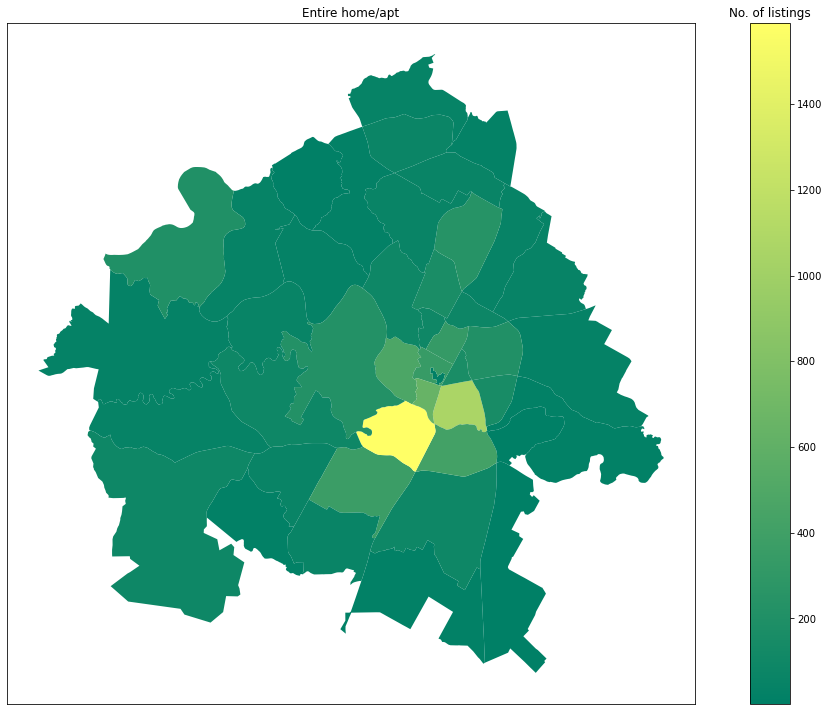

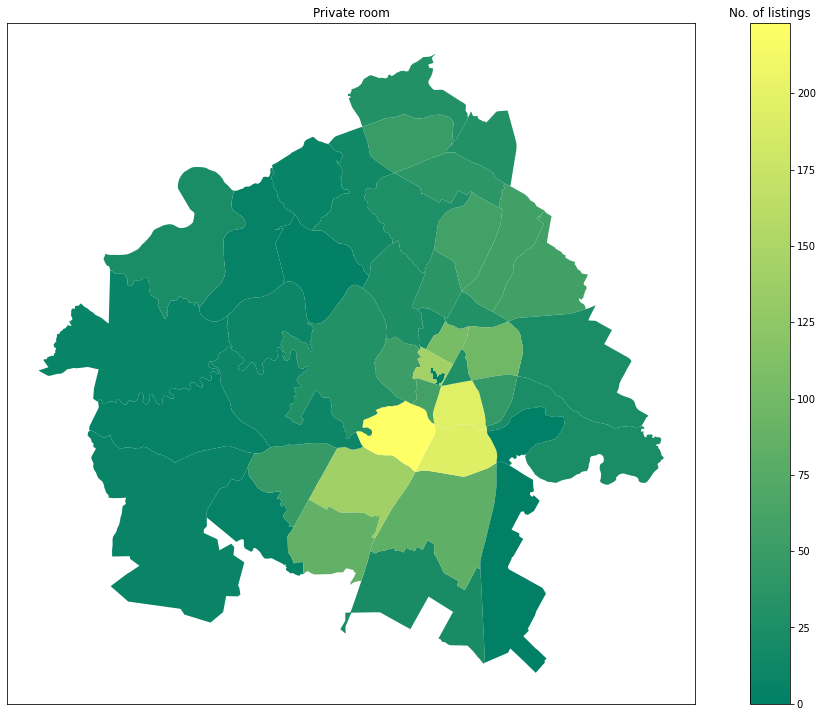

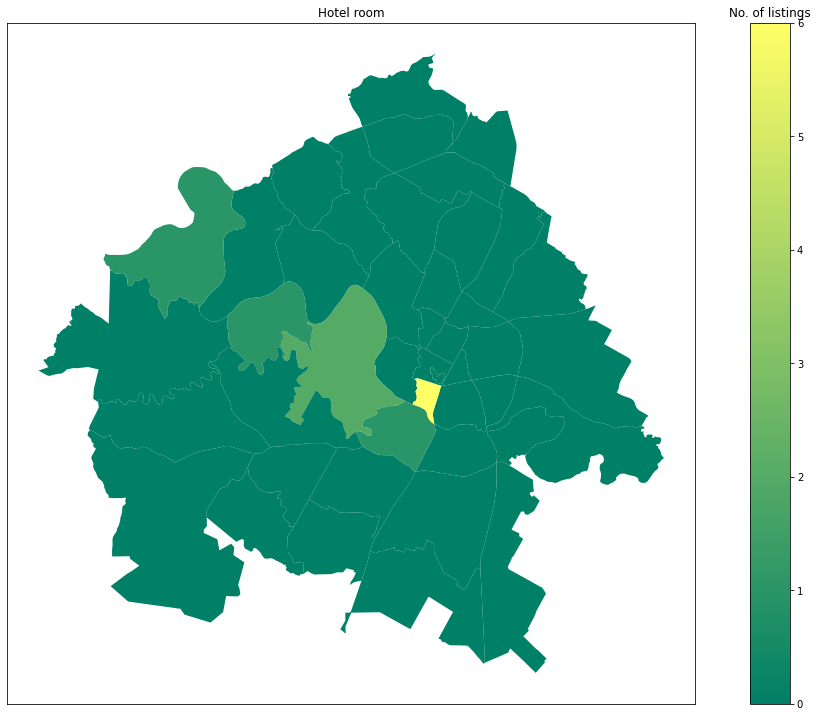

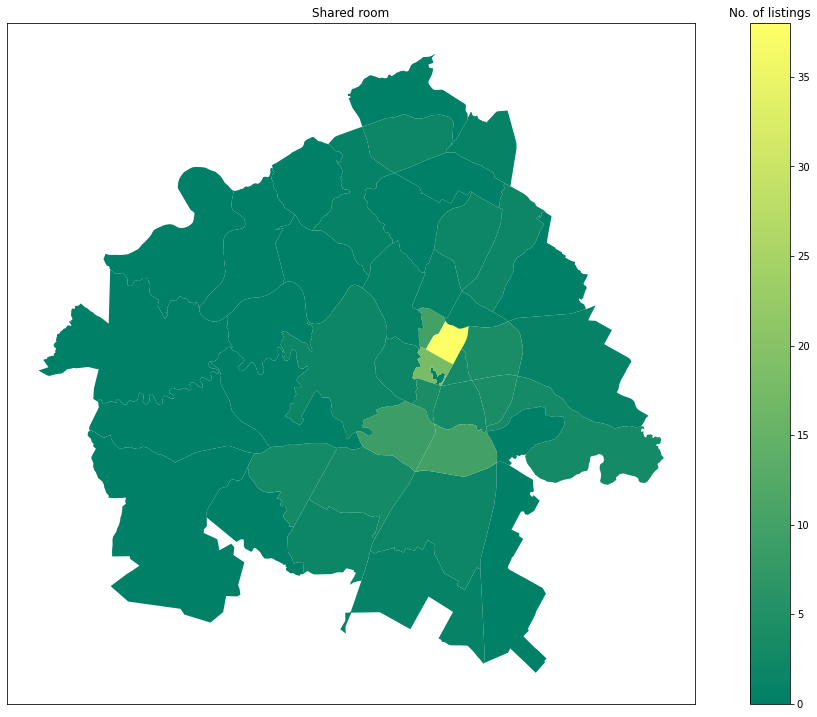

In [181]:
room_types = listings.room_type.unique().tolist()

for room in room_types:
    thematic(room)

In [144]:
print(listings.sort_values(by = ['calculated_host_listings_count'])['host_name'].unique()[-10:].tolist())

['Sonder (Austin)', 'GuestSpaces', 'Mo', 'Evolve Vacation Rental', 'Lodgewell', 'Kia', 'Above', 'Madalynn', 'Renters Club', 'WanderJaunt']


In [ ]:
for room in room_types:
    print(listings[listings['room_type'] == room]

[19, 49, 41, 89, 98, 17, 335, 1, 37, 16, 166, 29, 88, 43, 1065, 418, 3, 5, 166, 475, 44, 60, 34, 370, 94, 60, 73, 85, 37, 1589, 45, 345, 238, 221, 58, 8, 55, 211, 24, 89, 155, 61, 202, 644]
    listings neighbourhood
0         19         78739
1         49         78754
2         41         78732
3         89         78737
4         98         78756
5         17         78747
6        335         78751
7          1         78712
8         37         78738
9         16         78725
10       166         78757
11        29         78728
12        88         78744
13        43         78736
14      1065         78702
15       418         78741
16         3         78719
17         5         78742
18       166         78722
19       475         78703
20        44         78717
21        60         78749
22        34         78730
23       370         78745
24        94         78731
25        60         78748
26        73         78729
27        85         78752
28        37         78724


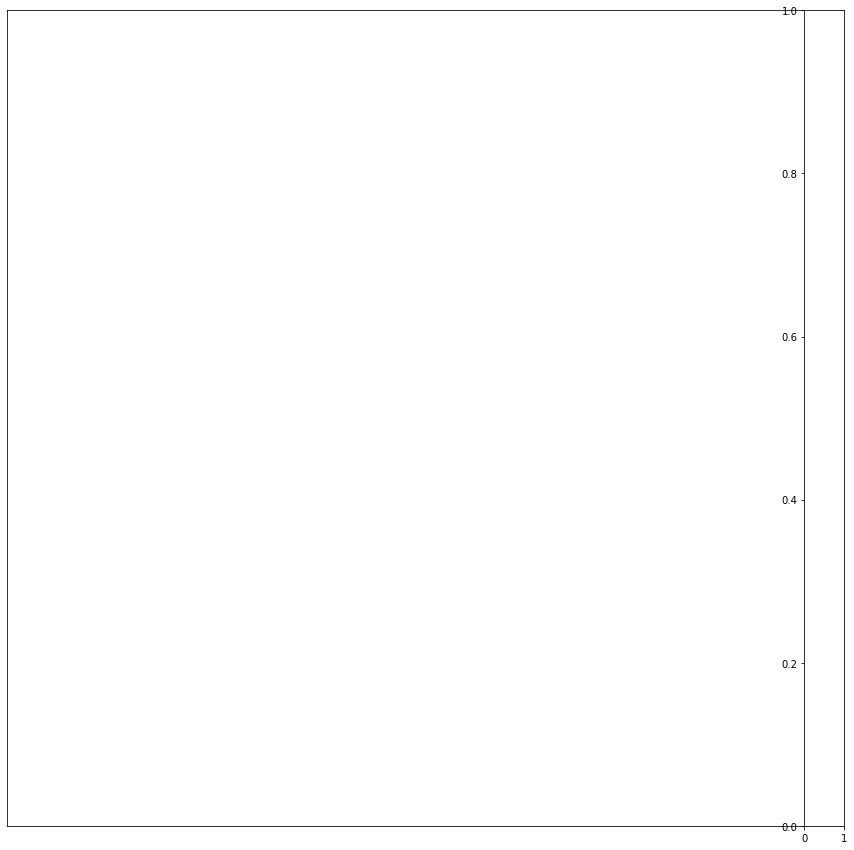

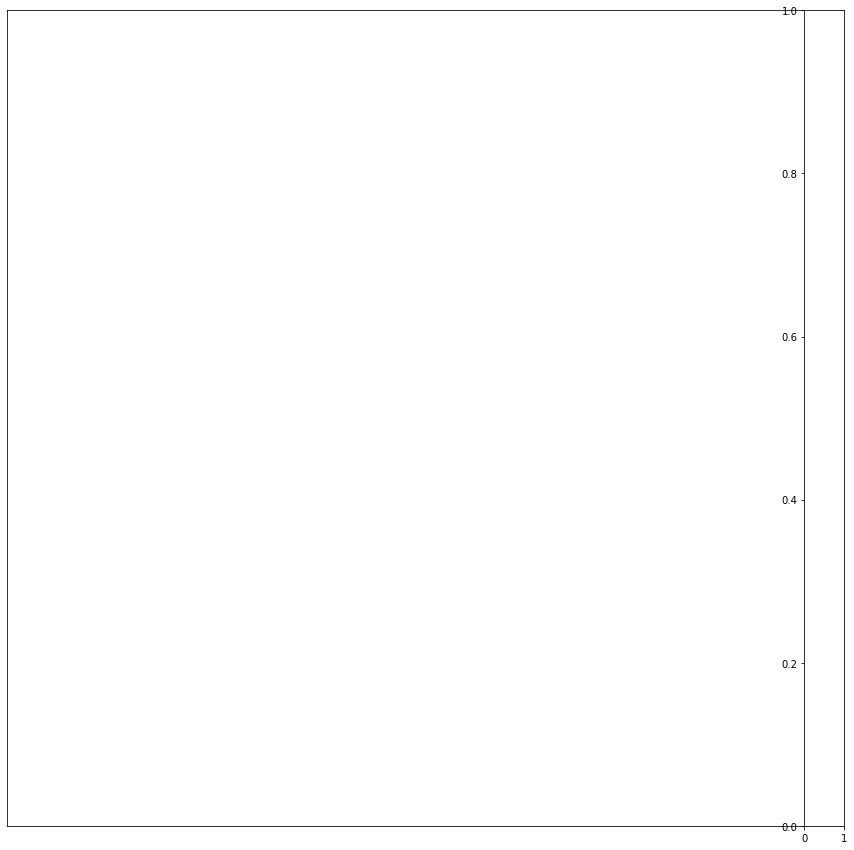

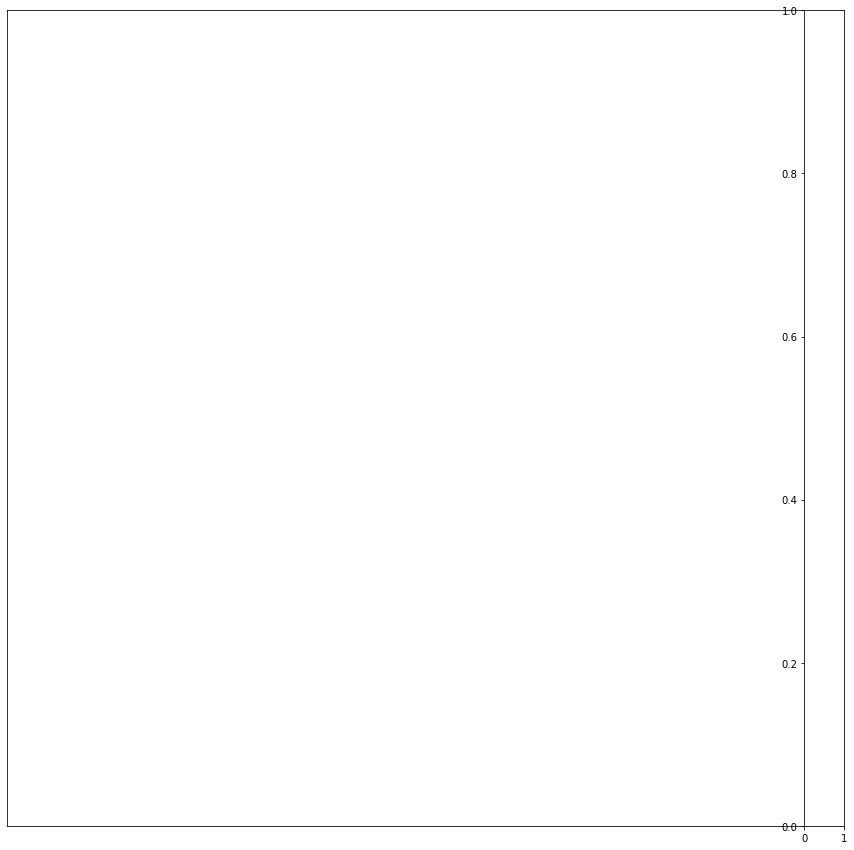

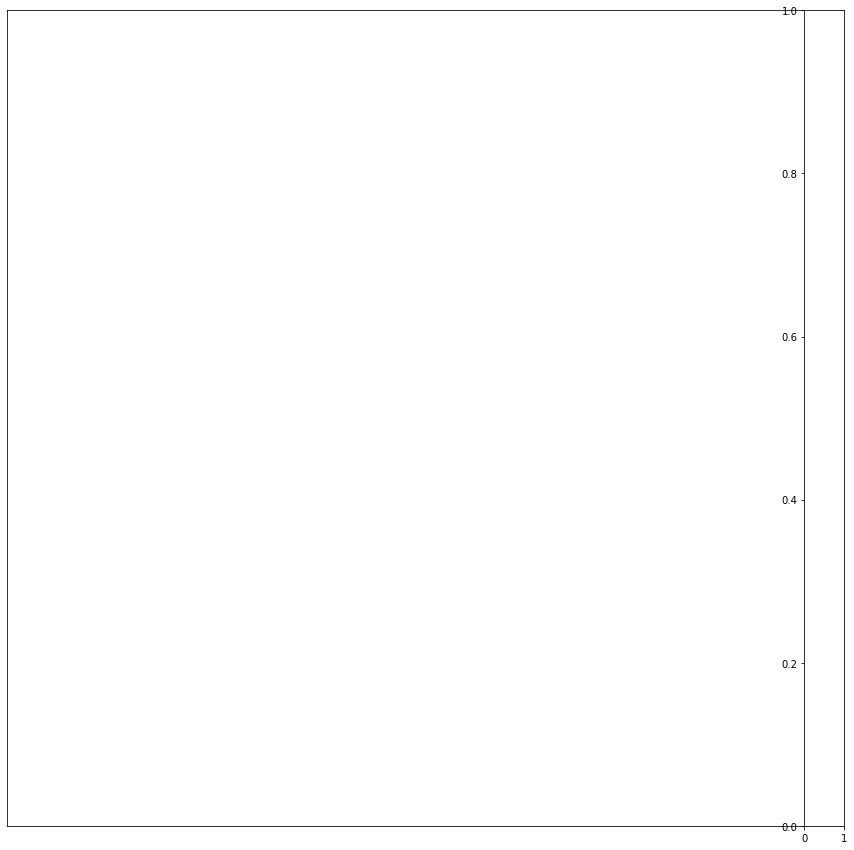

In [172]:
room_types = listings.room_type.unique().tolist()

for room in room_types:
    data = listings[listings['room_type'] == room]
    thematic(room)

In [168]:
neigh = 78704
listings[listings['room_type'] == room].neighbourhood.tolist().count(neigh)

1589